<a href="https://colab.research.google.com/github/oonid/growth-hacking-with-nlp-sentiment-analysis/blob/master/evaluate_dictionary_based_sentiment_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# all imports and related

%matplotlib inline

import pandas as pd
import numpy as np
import altair as alt
import seaborn as sn
import matplotlib.pyplot as plt

from nltk import download as nltk_download
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment.util import mark_negation

nltk_download('punkt')  # required by word_tokenize

from itertools import product


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Convert the sentiment scores of the small_corpus.csv into sentiment values

### load the dictionary_based_sentiment CSV

run process from
[create_dictionary_based_sentiment_analyzer.ipynb](https://github.com/oonid/growth-hacking-with-nlp-sentiment-analysis/blob/master/create_dictionary_based_sentiment_analyzer.ipynb)

copy file **dictionary_based_sentiment.csv** to this Google Colab Files (via file upload or mount drive).


In [2]:
df = pd.read_csv('dictionary_based_sentiment.csv')
df

,rating,review,review dictionary based sentiment
0,1,Recently UBISOFT had to settle a huge class-ac...,-0.013158
1,1,"code didn't work, got me a refund.",0.285714
2,1,"these do not work at all, all i get is static ...",0.000000
3,1,well let me start by saying that when i first ...,-0.020521
4,1,"Dont waste your money, you will just end up us...",0.000000
...,...,...,...
4495,5,"Nice long micro USB cable, battery lasts a lon...",0.058824
4496,5,I've been having a great time with this game. ...,0.222222
4497,5,d,0.000000
4498,5,"Really pretty, funny, interesting game. Works ...",0.455556


### Categorize the reviews as positive, negative, or neutral on the basis of the sentiment scores

In [3]:
def categorize_review(sentiment):
    if sentiment > 0.2:
        return 1  # 'positive'
    elif -0.2 <= sentiment <= 0.2:
        return 0  # 'neutral'
    else:  # sentiment < 0.2
        return -1  # 'negative'

review_category = df['review dictionary based sentiment'].apply(categorize_review)
review_category 

0       0
1       1
2       0
3       0
4       0
       ..
4495    0
4496    1
4497    0
4498    1
4499    0
Name: review dictionary based sentiment, Length: 4500, dtype: int64

In [4]:
def categorize_rating(rating):
    if rating == 5:
        return 1  # 'positive'
    elif 2 <= rating <= 4:
        return 0  # 'neutral'
    else:  # rating == 1
        return -1  # 'negative'

rating_classes = df['rating'].apply(categorize_rating)
rating_classes


0      -1
1      -1
2      -1
3      -1
4      -1
       ..
4495    1
4496    1
4497    1
4498    1
4499    1
Name: rating, Length: 4500, dtype: int64

In [5]:
df['review category'] = review_category
df['rating classes'] = rating_classes
df

,rating,review,review dictionary based sentiment,review category,rating classes
0,1,Recently UBISOFT had to settle a huge class-ac...,-0.013158,0,-1
1,1,"code didn't work, got me a refund.",0.285714,1,-1
2,1,"these do not work at all, all i get is static ...",0.000000,0,-1
3,1,well let me start by saying that when i first ...,-0.020521,0,-1
4,1,"Dont waste your money, you will just end up us...",0.000000,0,-1
...,...,...,...,...,...
4495,5,"Nice long micro USB cable, battery lasts a lon...",0.058824,0,1
4496,5,I've been having a great time with this game. ...,0.222222,1,1
4497,5,d,0.000000,0,1
4498,5,"Really pretty, funny, interesting game. Works ...",0.455556,1,1


In [6]:
df.to_csv('dictionary_based_sentiment_evaluation.csv')

# Evaluate your dictionary-based sentiment analyzer


### How many reviews are categorized correctly as positive, negative, or neutral by your dictionary-based sentiment analyzer? (This value is called accuracy.)

In [7]:
# check if review category is correctly classified with rating classes
s = np.where(df['review category'] == df['rating classes'], 1, 0)
print('array of correctly classified (len: {}): {}'.format(len(s), s))

# sum value 1 (correctly classified) div by total categorized data
a = sum(s) / len(s)
print('accuracy of correctly classified category: {} / {} = {}'\
      .format(sum(s), len(s), a))

array of correctly classified (len: 4500): [0 0 0 ... 0 1 0]
accuracy of correctly classified category: 1866 / 4500 = 0.4146666666666667


### use the metrics module of scikit learn package

import functions from sklearn.metrics

In [8]:
from sklearn.metrics import accuracy_score

y_pred = list(df['review category'])
y_true = list(df['rating classes'])

print('accuracy score: {}'.format(accuracy_score(y_true=y_true, y_pred=y_pred)))
print('accuracy score (normalized): {}'\
      .format(accuracy_score(y_true=y_true, y_pred=y_pred, normalize=True)))

accuracy score: 0.4146666666666667
accuracy score (normalized): 0.4146666666666667


In [9]:
from sklearn.metrics import classification_report

target_names = ['class Negative', 'class Neutral', 'class Positive']

print('classification report:\n{}'\
      .format(classification_report(y_true=y_true, y_pred=y_pred,
                                    target_names=target_names)))

classification report:
                precision    recall  f1-score   support

class Negative       0.76      0.05      0.09      1500
 class Neutral       0.36      0.94      0.52      1500
class Positive       0.80      0.26      0.40      1500

      accuracy                           0.41      4500
     macro avg       0.64      0.41      0.33      4500
  weighted avg       0.64      0.41      0.33      4500



### create confusion matrix

plot with matplotlib and seaborn heatmap

confusion matrix:
[[  68 1411   21]
 [  20 1404   76]
 [   2 1104  394]]


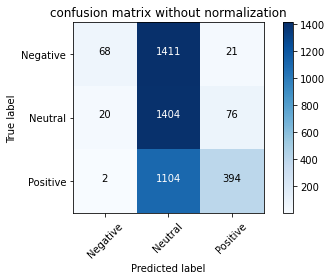

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
print('confusion matrix:\n{}'.format(cm))

plt.figure()
target_names = ['Negative', 'Neutral', 'Positive']
normalize = False

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('confusion matrix without normalization')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)

fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()


confusion matrix (normalized):
[[0.01511111 0.31355556 0.00466667]
 [0.00444444 0.312      0.01688889]
 [0.00044444 0.24533333 0.08755556]]


[]

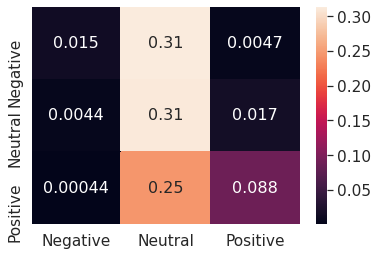

In [11]:
sn.set(font_scale=1.4)  # seaborn

target_names = ['Negative', 'Neutral', 'Positive']

cmn = confusion_matrix(y_true=y_true, y_pred=y_pred, normalize='all')
print('confusion matrix (normalized):\n{}'.format(cmn))
df_cmn = pd.DataFrame(cmn, index=target_names, columns=target_names)
sn.heatmap(df_cmn, annot=True, annot_kws={"size": 16})

plt.plot()

### Write a textual summary on the performance of your sentiment analyzer

use the evaluation text report function of the metrics module

In [12]:
from sklearn.metrics import classification_report

y_pred = list(df['review category'])
y_true = list(df['rating classes'])
target_names = ['class Negative', 'class Neutral', 'class Positive']

print('classification report:\n{}'\
      .format(classification_report(y_true=y_true, y_pred=y_pred,
                                    target_names=target_names)))

classification report:
                precision    recall  f1-score   support

class Negative       0.76      0.05      0.09      1500
 class Neutral       0.36      0.94      0.52      1500
class Positive       0.80      0.26      0.40      1500

      accuracy                           0.41      4500
     macro avg       0.64      0.41      0.33      4500
  weighted avg       0.64      0.41      0.33      4500



# Illustrate the evaluation of your sentiment analyzer

create confusion matrix using altair


In [13]:
y_true = list(df['rating classes'])
y_pred = list(df['review category'])

# labels = np.unique(y_true)  # no -1 value on y_true(?)
labels = [-1, 0, 1]
cm = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=labels)
cm = [y for i in cm for y in i]
roll = list(product(labels, repeat = 2))
columns = ["actual", "predicted", "confusion_matrix"]
df_cm_alt = pd.DataFrame(columns=columns)
for i in range(len(roll)):
    df_cm_alt = df_cm_alt.append({
        'actual':roll[i][0], 
        'predicted':roll[i][1], 
        'confusion_matrix':cm[i]}, ignore_index=True)

# create chart
cm_alt_chart = alt.Chart(df_cm_alt).mark_rect()\
    .encode(x="predicted:O", y="actual:O", color="confusion_matrix:Q")\
    .properties(width=640, height=480)
cm_alt_chart

alt.Chart(...)